## AgriConnect Summit Hackathon - Bridging the Generational Divide

### Inital Data Cleaning

In [1]:
import pyreadstat
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [219]:
df_original, meta = pyreadstat.read_sav('A2F_2023_Revised_dataset_with_Revised_weights.sav') 

In [233]:
df_original.to_csv("A2F_2023_Revised_dataset_with_Revised_weights.csv", index = False) # Save as CSV

In [226]:
df = pd.read_csv("A2F_2023_Revised_dataset_with_Revised_weights.csv")
df.head()

,statecode,state_code,e6,state,agegroup,respondent_serial,Weightingvariable,final_hh_wgt,region,state_name,lga_name,locality_name,ea_name,sector,ea_code,ee1,hh_total_size_1,hh_total_size_2,hh_total_size_3,hh_age_15_17_1,hh_age_15_17_2,hh_age_15_17_3,hh_age_18_plus_1,hh_age_18_plus_2,hh_age_18_plus_3,q1_1,c1,c2a,c2b,c3a,c3b,c4,c5,d1,d2_1,d2_2,d2_3,d2_4,d2_5,d2_96,d2_95,d2_98,d2_other,d3_1,d3_2,d3_3,d3_4,d3_5,d3_6,d3_7,d3_8,d3_9,d3_10,d3_11,d3_12,d3_13,d3_14,d3_15,d3_16,d3_17,d3_18,d3_19,d3_20,d3_21,d3_22,d3_23,d3_24,d3_25,d4a_1,d4a_2,d4a_3,d4a_4,d4a_5,d4a_6,d4b,d5,d6,d7,d8a,d8b,d8c,d8d,d8e,d9a,d9b_1,d9b_2,d9b_3,d9b_4,d9b_5,d9b_6,d10,e1_1,e1_2,e1_3,e1_4,e1_5,e1_98,e1_6,e1_other,e2_1,e2_2,e2_3,e2_4,e2_5,e2_98,e2_6,e3,e4,e5,e7,e8,e9_1,e9_2,e9_3,e9_4,e9_5,e9_6,e9_7,e9_8,e9_9,e9_10,e9_11,e9_12,e9_13,e9_14,e9_15,e9_16,e9_17,e9_18,e9_19,e9_98,e9_other,e10,e11,e11_other,e12,e12_other,e13a_1,e13a_2,e13a_3,e13a_4,e13a_5,e13a_6,e13a_7,e13a_8,e13a_9,e13a_10,e13a_11,e13a_12,e13a_13,e13a_14,e13a_15,e13a_16,e13a_17,e13a_18,e13a_19,e13a_20,e13a_21,e13a_other,e13b,e13d_1,e13d_2,e13d_3,e13d_4,e13d_5,e13d_6,e13d_7,e14_1,e14_2,e14_3,e14_4,e14_5,e14_6,e14_7,e14_8,e14_9,e14_10,e14_11,e14_12,e14_13,e14_14,e14_15,e14_16,e14_17,e14_18,f3,f3_other,f4a_1,f4a_2,f4a_3,f4a_4,f4a_5,f4a_6,f4a_7,f4a_8,f4a_9,f4a_10,f4a_11,f4a_12,f4a_13,f4a_14,f4a_15,f4a_16,f4a_17,f4a_18,f4a_19,f4a_20,f4a_98,f4a_other,f4b,f5a,f5b,f5c,f6,f7a1,f7b,f7b_other,f7b1,f7c,f7d,f7d_other,f8_1,f8_2,f8_3,f8_4,f8_5,f8_6,f8_7,f8_8,f9,f10,f11,f12_1,f12_2,f12_3,f12_4,f14,f15,f16,f17,f18,f19,f20,f26,f27,f28,f29,f30,f31,qf1_1,qf1_2,qf1_16,qf1_3,qf1_4,qf1_5,qf1_6,qf1_7,qf1_8,qf1_9,qf1_10,qf1_11,qf1_12,qf1_13,qf1_14,qf1_15,qf1_17,qf2_1,qf2_2,qf2_16,qf2_3,qf2_4,qf2_5,qf2_6,qf2_7,qf2_8,qf2_9,qf2_10,qf3_1,qf3_2,qf3_16,qf3_3,qf3_4,qf3_5,qf3_6,qf3_7,qf3_8,qf3_9,qf3_10,qf3_11,qf3_12,qf3_13,qf3_14,qf3_15,qf4_1,qf4_2,qf4_16,qf4_3,qf4_4,qf4_5,qf4_6,qf4_7,qf4_8,qf4_9,qf4_10,qf4_11,qf4_12,qf4_13,qf4_14,qf4_15,qf5_1,qf5_2,qf5_16,qf5_3,qf5_4,qf5_5,qf5_6,qf5_7,qf5_8,qf5_9,qf5_10,qf5_11,qf5_12,qf5_13,qf5_14,qf5_15,qf6_1_1,qf6_1_2,qf6_1_3,qf6_1_4,qf6_1_5,qf6_1_6,qf6_1_7,qf6_1_8,qf6_1_9,qf6_1_10,qf6_1_11,qf6_1_12,qf6_1_13,qf6_1_14,qf6_1_15,qf6_2_1,qf6_2_2,qf6_2_3,qf6_2_4,qf6_2_5,qf6_2_6,qf6_2_7,qf6_2_8,qf6_2_9,qf6_2_10,qf6_2_11,qf6_2_12,qf6_2_13,qf6_2_14,qf6_2_15,qf6_16_1,qf6_16_2,qf6_16_3,qf6_16_4,qf6_16_5,qf6_16_6,qf6_16_7,qf6_16_8,qf6_16_9,qf6_16_10,qf6_16_11,qf6_16_12,qf6_16_13,qf6_16_14,qf6_16_15,qf6_3_1,qf6_3_2,qf6_3_3,qf6_3_4,qf6_3_5,qf6_3_6,qf6_3_7,qf6_3_8,qf6_3_9,qf6_3_10,qf6_3_11,qf6_3_12,qf6_3_13,qf6_3_14,qf6_3_15,qf6_4_1,qf6_4_2,qf6_4_3,qf6_4_4,qf6_4_5,qf6_4_6,qf6_4_7,qf6_4_8,qf6_4_9,qf6_4_10,qf6_4_11,qf6_4_12,qf6_4_13,qf6_4_14,qf6_4_15,qf6_5_1,qf6_5_2,qf6_5_3,qf6_5_4,qf6_5_5,qf6_5_6,qf6_5_7,qf6_5_8,qf6_5_9,qf6_5_10,qf6_5_11,qf6_5_12,qf6_5_13,qf6_5_14,qf6_5_15,qf6_6_1,qf6_6_2,qf6_6_3,qf6_6_4,qf6_6_5,qf6_6_6,qf6_6_7,qf6_6_8,qf6_6_9,qf6_6_10,qf6_6_11,qf6_6_12,qf6_6_13,qf6_6_14,qf6_6_15,qf6_7_1,qf6_7_2,qf6_7_3,qf6_7_4,qf6_7_5,qf6_7_6,qf6_7_7,qf6_7_8,qf6_7_9,qf6_7_10,qf6_7_11,qf6_7_12,qf6_7_13,qf6_7_14,qf6_7_15,qf6_8_1,qf6_8_2,qf6_8_3,qf6_8_4,qf6_8_5,qf6_8_6,qf6_8_7,qf6_8_8,qf6_8_9,qf6_8_10,qf6_8_11,qf6_8_12,qf6_8_13,qf6_8_14,qf6_8_15,qf6_9_1,qf6_9_2,qf6_9_3,qf6_9_4,qf6_9_5,qf6_9_6,qf6_9_7,qf6_9_8,qf6_9_9,qf6_9_10,qf6_9_11,qf6_9_12,qf6_9_13,qf6_9_14,qf6_9_15,qf6_10_1,qf6_10_2,qf6_10_3,qf6_10_4,qf6_10_5,qf6_10_6,qf6_10_7,qf6_10_8,qf6_10_9,qf6_10_10,qf6_10_11,qf6_10_12,qf6_10_13,qf6_10_14,qf6_10_15,qf7a_1,qf7a_2,qf7a_16,qf7a_3,qf7a_4,qf7a_5,qf7a_6,qf7a_7,qf7a_8,qf7a_9,qf7a_10,qf7a_11,qf7a_12,qf7a_13,qf7a_14,qf7a_15,qf7b_1,qf7b_2,qf7b_16,qf7b_3,qf7b_4,qf7b_5,qf7b_6,qf7b_7,qf7b_8,qf7b_9,qf7b_10,qf7b_11,qf7b_12,qf7b_13,qf7b_14,qf7b_15,qf8,qf9_1,qf9_2,qf9_3,qf9_4,qf9_5,qf9_6,qf9_7,qf9_8,qf9_9,qf9_98,qf9_other,qf10filt01,qf10filt02,qf10filt03,qf10filt04,qf10filt05,qf10filt06,qf10filt07,qf10filt08,qf10filt09,qf10filt10,qf10filt11,qf10filt12,qf10filt13,qf10filt14,qf10filt15,qf10filt16,qf10a_1,qf10a_2,qf10a_16,qf10a_

In [ ]:
# Undo One-Hot Encoding

# Identify base columns (prefixes like 'd2', 'd3', etc.)
grouped_columns = defaultdict(list)
for col in df.columns:
     base = col.split("_")[0]
     grouped_columns[base].append(col)

# Reverse one-hot encode each group
for base, columns in grouped_columns.items():
     if len(columns) <= 1:
         continue  # Skip columns that are not one-hot encoded

     def get_selected_option(row):
         for col in columns:
             if row[col] == 1:
                 return col.replace(base + "_", "")
         return None

     df[base + "_category"] = df[columns].apply(get_selected_option, axis=1)
     df.drop(columns=columns, inplace=True)

In [18]:
df.head()

,statecode,e6,agegroup,respondent_serial,Weightingvariable,final_hh_wgt,region,lga_name,locality_name,sector,ee1,q1_1,c1,c2a,c2b,c3a,c3b,c4,c5,d1,d4b,d5,d6,d7,d8a,d8b,d8c,d8d,d8e,d9a,d10,e3,e4,e5,e7,e8,e10,e13b,f4b,f5a,f5b,f5c,f6,f7a1,f7b1,f7c,f9,f10,f11,f14,f15,f16,f17,f18,f19,f20,f26,f27,f28,f29,f30,f31,qf8,qf10filt01,qf10filt02,qf10filt03,qf10filt04,qf10filt05,qf10filt06,qf10filt07,qf10filt08,qf10filt09,qf10filt10,qf10filt11,qf10filt12,qf10filt13,qf10filt14,qf10filt15,qf10filt16,fs4,ba2,ba3,mf2,py2a,te2,te4,te4a,mm1a,mm1b,mm3a,mm6,mm8a,mt3,mt4,mt4text,mt8,mt9,mt9text,mt13,mt14text,mt17b,mt18,mt19text,sa1,sa1b,sa3b,sa4a,sa8a,sa12,sa8d,sa9,sa10a,sa13,sa17a,sa17b,sa18,sa19,lc1dummy1,lc1dummy2,lc1a,lc2b,lc3,lc5a,lc5b,lc5c,lc5ctxt,cc3,cc3text,cc5,rm1b,rm1d,rm2b,rm3,rm5,pc4,ie1a,ie1b,ie1di,gen1,fparticipants,pension,banked,other_f,informal,wealthscore,quintile,saving_strand,mobile_money,financial_agents,transactional_acc,target_groups,cooperative,village_comm_association,money_lender,state_category,ea_category,hh_category,d2_category,d3_category,d4a_category,d9b_category,e1_category,e2_category,e9_category,e11_category,e12_category,e13a_category,e13d_category,e14_category,f3_category,f4a_category,f7b_category,f7d_category,f8_category,f12_category,qf1_category,qf2_category,qf3_category,qf4_category,qf5_category,qf6_category,qf7a_category,qf7b_category,qf9_category,qf10a_category,qf10b_category,fs1_category,fs2_category,fs3_category,ba1_category,ba4_category,mf1_category,mf3_category,nb1_category,py1a_category,py1b_category,py2b_category,te1_category,te3_category,mm2a_category,mm3b_category,mm3c_category,mm4_category,mm5_category,mm7_category,mm9a_category,mm9b_category,mm10a_category,mm10b_category,mm11_category,mt1_category,mt2a_category,mt2c_category,mt5_category,mt7a_category,mt7c_category,mt10_category,mt12a_category,mt12c_category,mt14_category,mt15_category,mt16_category,mt17a_category,mt17c_category,mt19_category,mt20_category,mt21_category,sa2_category,sa3a_category,sa3c_category,sa6_category,sa7a_category,sa7b1_category,sa8b_category,sa8c_category,sa11a_category,sa11b_category,sa14_category,sa15_category,sa16_category,lc1_category,lc2a_category,lc2c_category,lc2d_category,lc2e_category,lc4_category,cc1_category,cc2_category,cc4_category,cc6_category,rm1a_category,rm1c_category,rm2c_category,rm2d_category,rm4_category,rm6_category,rm7_category,rm9_category,rm10_category,rm11_category,pol1_category,pol2a_category,pol2b_category,pol3_category,inf1a_category,inf1b_category,inf2_category,inf3_category,inf4_category,inf5_category,pc1_category,pc2_category,pc3_category,ie1d_category,gen1a_category,gen2_category,gen3_category,gen5_category,pwd1_category,fas_category,savings_category,credit_category,remittances_category,insurance_category,dfs_category,income_category,merchant_category,investments_category,microfinance_category,finhealth_category,finlit_category,finneeds_category
0,1.0,2.0,2.0,3697287.0,686.992065,749.888855,2.0,UMUAHIA SOUTH,UMUORAM OHIYA,1.0,4.0,1.0,4.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,5.0,3.0,2.0,4.0,4.0,4.0,4.0,2.0,1.0,2.0,2.0,5.0,1.0,2.0,43.0,5.0,10.0,1.0,20.0,2.0,2.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,3.0,3.0,1.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,4.0,1.0,2.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,13.0,6.0,2.0,2.0,2.0,2.0,NaN,4.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0,25000.0,2.0,20000.0,2.0,1.0,NaN,2.0,NaN,NaN,2.379597,4.0,4.0,0.0,0.0,99.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,5.0,2,5,NaN,1,1,10,NaN,e12,18.0,NaN,1.0,NaN,20.0,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,1,1.0,NaN,1_1,2.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,13.0,NaN,NaN,2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,17,NaN,NaN,NaN,NaN,NaN,

In [20]:
df['wealthscore'].describe()

count    28392.000000
mean         0.225971
std          2.916770
min         -3.933216
25%         -2.371345
50%         -0.289888
75%          2.199689
max          8.486553
Name: wealthscore, dtype: float64

In [4]:
df.head(2)

,Weightingvariable,agegroup,banked,c1,c2a,c2b,c3a,c3b,c4,c5,cooperative,d1,d10,d2_category,d3_category,d4b,d5,d6,d7,d8a,d8b,d8c,d8d,d8e,d9a,e10,e13a_category,e13b,e3,e4,e5,e6,e7,e8,f10,f11,f12_category,f14,f15,f16,f17,f18,f19,f20,f26,f27,f28,f29,f30,f31,f3_category,f4a_category,f4b,f5a,f5b,f5c,f6,f7a1,f7c,final_hh_wgt,financial_agents,finhealth_category,finlit_category,finneeds_category,fs4,gen1,gen1a_category,ie1a,ie1di,income_category,inf1a_category,investments_category,lc1_category,lc1a,lc2b,lc5a,lc5b,lc5c,lga_name,locality_name,merchant_category,mm10a_category,mm10b_category,mm11_category,mm1a,mm1b,mm2a_category,mm3a,mm3b_category,mm3c_category,mm4_category,mm8a,mobile_money,mt12a_category,mt12c_category,mt1_category,mt2a_category,mt2c_category,mt3,mt4,mt7a_category,mt7c_category,mt8,mt9,pc1_category,pc4,pol1_category,pwd1_category,py1a_category,py1b_category,py2a,qf10a_category,qf10b_category,qf10filt01,qf10filt02,qf10filt03,qf10filt04,qf10filt05,qf10filt06,qf10filt07,qf10filt08,qf10filt09,qf10filt10,qf10filt11,qf10filt12,qf10filt13,qf10filt14,qf10filt15,qf10filt16,qf1_category,qf2_category,qf3_category,qf4_category,qf5_category,qf6_category,qf7a_category,qf7b_category,qf8,qf9_category,quintile,remittances_category,rm1a_category,rm1b,rm1c_category,rm1d,rm2b,rm3,rm4_category,rm5,rm9_category,sa1,sa10a,sa11a_category,sa12,sa13,sa14_category,sa15_category,sa16_category,sa17b,sa18,sa19,sa1b,sa2_category,sa3b,sa4a,sa6_category,sa7a_category,sa7b1_category,sa8a,sa8d,sa9,saving_strand,savings_category,sector,target_groups,te4,te4a,transactional_acc,village_comm_association,wealthscore,state_name
0,686.992065,2.0,2.0,4.0,2.0,1.0,1.0,No,2.0,Yes,0.0,Own A house,Myself with someone else,Inheritance,Two mattresses,Charcoal Wood,Main Electricity,Gas,Borehole/hand pump,Whole building,Concrete,Cement or concrete,Zinc,Yes,No,"Own business - provide a service (e.g., hairdr...",Artisan services,1.0,English,Married (Monogamy),Spouse/partner,Female,43.0,University/Polytechnic OND,"A sure gain of Naira. 1,750",Refused to answer,NaN,Don't know,Yes,No,Don't know,No,No,Don't know,Don't know,No,No,Yes,Don't know,Don't know,NaN,Have a goal but did nothing in the past 12 mon...,Have a goal but did nothing in the past 12 mon...,Sometimes,Sometimes,One month,Agree,For more than one month in the last twelve months,Very difficult,749.888855,No,save,control,goals,NaN,Spouse,NaN,25000.0,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,UMUAHIA SOUTH,UMUORAM OHIYA,NaN,NaN,NaN,When the agent offers a wide range of services,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,Did not send or receive money from friends or ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Provision shop,No,Income reduced,96,1,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,Have not experienced such events (Exclusive),NaN,NaN,No,NaN,No,NaN,No,No reason,Yes,NaN,Do not have enough money,No,Moderately confident,NaN,NaN,I don’t need to invest,Not at all confident,No,NaN,1-10%,School fees/education,Save in a safe place at home or carry it around,Occasionally,NaN,2,NaN,No,No,No,4.0,NaN,Urban,2.0,Moderately comfortable,Yes,99.0,0.0,2.379597,ABIA
1,1292.105957,2.0,2.0,5.0,2.0,0.0,2.0,No,2.0,Yes,0.0,Own A house,Myself,Inheritance,Two mattresses,Charcoal Wood,Main Electricity,Battery,Borehole/hand pump,Other,Concrete,Cement or concrete,Zinc,No,No,Own business/trader - farming produce/livestock,Wholesale and retail trade,0.0,English,Married (Monogamy),Spouse/partner,Female,51.0,University/Polytechnic OND,"A sure gain of Naira. 1,750","A 50% chance to lose Naira. 34,900 and a 50% c...",NaN,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,NaN,Have a goal but did nothing in the past 12 mon...,Have a goal but did nothing in the past 12 mon...,Sometimes,Sometimes,One month,Agree,It hasn't happened in the last twelve months,Very difficult,1028.419067,No,s

In [104]:
# Column Names (Key)
new_columns = \
    [
        'weighting_variable',            # Weighting Variable
        'age_group',                     # Age group  
        'household_size',                # c1: How many people live in this household?
        'adults_count',                  # c2a: How many people in the household are aged 18 years and above?
        'teens_count',                   # c2b: How many people in the household are aged between 15-17 years?
        'income_earners',                # c3a: How many people in this household bring money into the household?
        'has_unemployed',                # c3b: Is there any member aged 15+ who is unemployed but looking for work?
        'room_count',                    # c4: How many separate rooms do the members of the household occupy?
        'primary_education',             # c5: Has anyone 15+ completed primary school education?
        'ownership_status',              # d1: Do you or your family own or rent this house?
        'financial_decision_maker',      # d10: Who makes the main decisions about how money is spent?
        'house_acquisition',             # d2_category: How was this house acquired?
        'household_assets',              # d3_category: Which of the following do you have in your household?
        'cooking_facilities',            # d4b: What kind of cooking facilities do you have?
        'lighting_fuel',                 # d5: What is the main fuel used for lighting?
        'toilet_type',                   # d6: What type of toilet facilities does the household mainly use?
        'water_source',                  # d7: What is the main source of drinking water?
        'house_type',                    # d8a: What type of house does the household reside in?
        'floor_material',                # d8b: What is the main material of the floor?
        'wall_material',                 # d8c: What is the main material of the walls?
        'roof_material',                  # d8d: What is the predominant material of the roof?
        'has_bank_account',              # d8e: Does anyone in the household have a bank account?
        'has_disability',                # d9a: Is there anyone in this household that has a disability?
        'main_income_source',            # e10: Which of these sources of money you told me about do you rely most on?
        'income_sector',                 # e13a_category: In which sector would you say your source/sources of income falls into?
        'business_employees',            # e13b: How many people do you employ in your business?
        'language',                      # e3: Which language do you speak?
        'marital_status',                # e4: Which of the following best describes your marital status
        'relation_to_head',              # e5: What is your relationship with the head of the household?
        'gender',                        # e6: What is your gender?
        'age',                           # e7: How old are you?
        'education_level',                # e8: Highest level of education
        'risk_preference_gain',         # f10: If you could choose between two options, which would you take? (Profit)
        'risk_preference_loss',         # f11: If you could choose between two options, which would you take? (Loss)
        'financial_services',           # f12: Financial Services
        'info_clarity',                 # f14: Do you feel that information on financial products is clear and understandable?
        'fee_surprises',                # f15: Have you been surprised about fees/charges after taking financial products?
        'fee_change_notices',           # f16: Informed of changes to fees/charges in past 12 months?
        'fee_affordability',            # f17: Do you feel that bank fees or charges are affordable?
        'unfair_treatment',             # f18: Have you been unfairly treated by staff/agent from a financial institution?
        'service_problems',             # f19: Have you experienced a problem with your financial service provider?
        'system_downtime',              # f20: The Bank system or platform is always down
        'customer_support_satisfaction', # f26: Satisfied with financial institution's customer support
        'service_time',                 # f27: Whenever you visit a bank branch, you are always served on time
        'digital_banking',              # f28: Use mobile phone/tablets to manage financial activities
        'uses_budget',                  # f29: Do you budget for your money?
        'expense_awareness',            # f30: Do you know how much money you spent personally in the last 7 days?
        'financial_tracking',           # f31: Do you keep track of the money you get and spend
        'financial_goal',               # f3: Main goal requiring large amount of money trying to achieve
        'goal_actions',                 # f4a: What have you done in the last year to achieve this goal
        'main_goal_strategy',           # f4b: Which would you say is your main means of achieving your goal?
        'saving_frequency',             # f5a: Do you save or keep money for different reasons and how often?
        'investment_frequency',         # f5b: Do you invest money in assets and how often?
        'savings_months',               # f5c: How many months of income do you have in savings?
        'financial_planning',           # f6: To what extent do you agree: You plan ahead financially?
        'cash_shortage_frequency',      # f7a1: How often have you run out of money and couldn't cover expenses?
        'emergency_fund_access',        # f7c: How difficult to come up with N75,000 within the next 7 days?
        'final_hh_wgt',                 # Household Weights
        'financial_agents',             # Are you registered to any financial service?
        'finhealth',                    # Primary financial behavior describing interaction with money.
        'finlit',                       # Primary aspect of financial literacy reflecting an decision-making
        'finneeds',                     # Primary financial need or priority category
        'first_account_opening',        # fs4: Is this your first time opening an account?
        'work_decision_maker',          # gen1: Who in your family has a final say on whether you should work to earn income?
        'household_decision_role',      # gen1a: Your participation in making decisions on various aspects of household life
        'monthly_income',               # ie1a: Thinking about the total amount of money you receive, total personal monthly income
        'expense_breakdown',            # ie1di: How much you spend on each of these items (from the list)?
        'income_bracket',               # income_category: Your income category
        'financial_services_used',      # inf1a: Financial services you use or belong to
        'preferred_investments',        # investments_category: Which investment choice appeals to you?
        'credit_activities',           # lc1: In the past 12 months, have you...? (Loans, Credit and Repayment)
        'debt_manageability',          # lc1a: How manageable is your household debt?
        'main_lender',                 # lc2b: Who did you borrow the most money from?
        'borrowed_airtime',            # lc5a: Have you borrowed airtime from your network mobile provider?
        'airtime_borrow_frequency',    # lc5b: How often do/did you borrow airtime?
        'last_airtime_amount',         # lc5c:The last time you borrowed airtime, how much did you borrow?
        'local_government',            # lga_name: What is your local government?
        'locality',                    # locality_name: What is your locality?
        'agent_issues',                # mm10a: Have you experienced issues when using financial services agent?
        'agent_complaint_channel',     # mm10b: Who do you go to for unresolved agent problems?
        'agent_usage_incentives',      # mm11: What would encourage you to use a financial service agent?
        'mobile_money_awareness',      # mm1a: Have you heard of mobile money prior to today?
        'mobile_money_experience',     # mm1b: Statement best describing experience with mobile money
        'mobile_money_registration',   # mm2a: How did you register for mobile money?
        'mobile_money_frequency',      # mm3a: How often do/did you use your mobile money account?
        'mobile_money_provider',       # mm3b: Which mobile money service do/did you use?
        'mobile_money_issues',         # mm3c: Issues experienced while using mobile money services
        'mobile_money_adoption_reason', # mm4: What encouraged you to start using mobile money?
        'used_financial_agent',        # mm8a: Have you ever used a financial service agent?
        'intl_money_receive_method',   # mm12a: How have you received money from outside Nigeria?
        'intl_money_receive_reason',   # mm12c: Why did you mostly receive money in this way?
        'money_transfer_activities',   # mt1: Receiving and sending money activities in past six months
        'domestic_money_receive_method', # mt2a: How have you received money from within Nigeria?
        'domestic_money_receive_reason', # mt2c: Why did you mostly receive money this way?
        'receive_frequency',           # mt3: How often do you receive money from outside household?
        'avg_amount_received',         # mt4: Average amount of money normally received
        'domestic_money_send_method',  # mt7a: How have you sent money within Nigeria?
        'money_send_reason',           # mt7c: Why did you send money through these channels?
        'send_frequency',              # mt8: How often do you send money to people outside household?
        'avg_amount_sent',              # mt9: Average amount of money normally sent
        'nearby_facilities',           # pc1: Facilities close to where you live
        'mobility_restriction',        # pc4: Has family prevented you from going to market/hospital/meetings?
        'naira_redesign_impact',       # pol1: How Naira redesign policy affected your livelihood/income
        'disability_areas',            # pwd1: Which areas do you have difficulty in?
        'payment_methods_used',        # py1a: Which methods have you used to pay for goods?
        'payment_method_frequency',    # py1b: How often did you use this payment channel?
        'utility_bill_payments',       # py2a: Have you paid utility bills in past 12 months?
        'financial_institution_issues', # qf10a: Have you experienced problems with your financial institution?
        'complaint_escalation',        # qf10b: Who do you turn to for unresolved financial institution problems?
        'financial_institution',       # qf1: Which financial institution do you use?
        'services_used',               # qf2: Which service does your financial institution provide?
        'electronic_services',         # qf3: Does your institution provide this service electronically?
        'named_account',               # qf4: Do you have an account registered in your name?
        'current_institution_usage',   # qf5: Do you currently use this institution?
        'institution_activities',      # qf6: Activities you've done using this institution
        'institution_trust',           # qf7a: How much do you trust this institution?
        'last_institution_usage',      # qf7b: When did you last use this institution?
        'preferred_money_manager',     # qf8: Most important tool to help manage money and expenses
        'money_manager_reason',        # qf9: Why is this most important for managing your money?
        'quintile',                    # 5 quantiles of wealthscore
        'unexpected_expense_event',     # rm1a: What caused unexpected expenses in past 12 months?
        'highest_financial_impact',     # rm1b: Which had greatest impact on household finances?
        'financial_shock_response',     # rm1c: What did your household do when experiencing this event?
        'microinsurance_awareness',     # rm1d: Have you heard of micro-insurance?
        'has_microinsurance',           # rm2b: Do you have micro-insurance?
        'microinsurance_interest',      # rm3: Would you be interested in microinsurance?
        'preferred_microinsurance_type', # rm4: What type of microinsurance would you consider?
        'other_insurance_coverage',     # rm5: Are you covered by insurance other than microinsurance?
        'no_insurance_reason',          # rm9: Why do you not have insurance?
        'saved_last_year',              # sa1: In the past 12 months, did you save/put money aside?
        'contribution_frequency',       # sa10a: How often do you contribute (if making regular contributions)?
        'irregular_contribution_reason', # sa11a: Reason for not making regular contributions
        'micropension_awareness',       # sa12: Have you heard of Micro-Pension Plan?
        'longterm_goal_confidence',     # sa13: How confident are you about meeting long-term life goals?
        'understood_terms',             # sa14: Which financial terms have you understood?
        'used_terms',                   # sa15: Which financial terms have you used?
        'no_investment_reason',         # sa16: Why have you not used any investment products?
        'stock_market_trust',           # sa17b: To what extent do you trust the stock market?
        'ponzi_investment_history',     # sa18: Have you ever invested with a Ponzi/pyramid scheme?
        'ponzi_loss_experience',        # sa19: Have you lost money from illegal fund manager/Ponzi scheme?
        'income_save_percentage',       # sa1b: How much of your income do you typically save?
        'saving_purpose',               # sa2: What did you mainly save/put money aside for?
        'preferred_saving_method',      # sa3b: Which ways of saving suits you best?
        'saving_frequency',             # sa4a: How often do you mostly save?
        'non_saving_reason',            # sa6: If you don't save, why?
        'retirement_planning',          # sa7a: How will you ensure money for needs when old/unable to work?
        'saving_types',                 # sa7b1: Which types of saving do you have?
        'has_pension_fund',             # sa8a: Do you have a pension fund?
        'has_micropension',             # sa8d: Do you have a micro-pension scheme?
        'regular_retirement_contribution', # sa9: Are you making regular contributions for retirement?
        'savings_strand',                # saving_strand: Savings Strand
        'savings_category',              # savings_category: Savings Category
        'residence_sector',              # sector: Sector (Rural or Urban)
        'smartphone_app_comfort_level',  # te4: Indicates comforts using smartphone apps
        'phone_network_reliability',     # te4a: Indicates access to a reliable phone network
        'has_transactional_account',     # transactional_acc: Clear yes/no about having a financial account
        'village_association_membership',  # village_comm_association: Indicates community group membership
        'wealth_score',                  # wealthscore: Wealth Score
        'state_name'                     # state_name: State
    ]
df.columns = new_columns

In [107]:
df.head()

,weighting_variable,age_group,household_size,adults_count,teens_count,income_earners,has_unemployed,room_count,primary_education,ownership_status,financial_decision_maker,house_acquisition,household_assets,cooking_facilities,lighting_fuel,toilet_type,water_source,house_type,floor_material,wall_material,roof_material,has_bank_account,has_disability,main_income_source,income_sector,business_employees,language,marital_status,relation_to_head,gender,age,education_level,risk_preference_gain,risk_preference_loss,financial_services,info_clarity,fee_surprises,fee_change_notices,fee_affordability,unfair_treatment,service_problems,system_downtime,customer_support_satisfaction,service_time,digital_banking,uses_budget,expense_awareness,financial_tracking,financial_goal,goal_actions,main_goal_strategy,saving_frequency,investment_frequency,savings_months,financial_planning,cash_shortage_frequency,emergency_fund_access,final_hh_wgt,financial_agents,finhealth,finlit,finneeds,first_account_opening,work_decision_maker,household_decision_role,monthly_income,expense_breakdown,income_bracket,financial_services_used,preferred_investments,credit_activities,debt_manageability,main_lender,borrowed_airtime,airtime_borrow_frequency,last_airtime_amount,local_government,locality,agent_issues,agent_complaint_channel,agent_usage_incentives,mobile_money_awareness,mobile_money_experience,mobile_money_registration,mobile_money_frequency,mobile_money_provider,mobile_money_issues,mobile_money_adoption_reason,used_financial_agent,intl_money_receive_method,intl_money_receive_reason,money_transfer_activities,domestic_money_receive_method,domestic_money_receive_reason,receive_frequency,avg_amount_received,domestic_money_send_method,money_send_reason,send_frequency,avg_amount_sent,nearby_facilities,mobility_restriction,naira_redesign_impact,disability_areas,payment_methods_used,payment_method_frequency,utility_bill_payments,financial_institution_issues,complaint_escalation,financial_institution,services_used,electronic_services,named_account,current_institution_usage,institution_activities,institution_trust,last_institution_usage,preferred_money_manager,money_manager_reason,quintile,unexpected_expense_event,highest_financial_impact,financial_shock_response,microinsurance_awareness,has_microinsurance,microinsurance_interest,preferred_microinsurance_type,other_insurance_coverage,no_insurance_reason,saved_last_year,contribution_frequency,irregular_contribution_reason,micropension_awareness,longterm_goal_confidence,understood_terms,used_terms,no_investment_reason,stock_market_trust,ponzi_investment_history,ponzi_loss_experience,income_save_percentage,saving_purpose,preferred_saving_method,saving_frequency,non_saving_reason,retirement_planning,saving_types,has_pension_fund,has_micropension,regular_retirement_contribution,savings_strand,savings_category,residence_sector,demographic_group,smartphone_app_comfort_level,phone_network_reliability,has_transactional_account,village_association_membership,wealth_score,state_name
0,686.992065,2.0,4.0,2.0,1.0,1.0,No,2.0,Yes,Own A house,Myself with someone else,Inheritance,Two mattresses,Charcoal Wood,Main Electricity,Gas,Borehole/hand pump,Whole building,Concrete,Cement or concrete,Zinc,Yes,No,"Own business - provide a service (e.g., hairdr...",Artisan services,1.0,English,Married (Monogamy),Spouse/partner,Female,43.0,University/Polytechnic OND,"A sure gain of Naira. 1,750",Refused to answer,NaN,Don't know,Yes,No,Don't know,No,No,Don't know,Don't know,No,No,Yes,Don't know,Don't know,NaN,Have a goal but did nothing in the past 12 mon...,Have a goal but did nothing in the past 12 mon...,Sometimes,Sometimes,One month,Agree,For more than one month in the last twelve months,Very difficult,749.888855,No,save,control,goals,NaN,Spouse,NaN,25000.0,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,UMUAHIA SOUTH,UMUORAM OHIYA,NaN,NaN,When the agent offers a wide range of services,No,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,Did not send or receive money fro

In [138]:
# Inspect columns one after the other for missing and inaccurate values
# This code block is ran many times and current cell output does not reflect all activities done here
error_columns = []
k = 0
for col in df.select_dtypes(include = "number").columns: # Use include = "object" for other data types
    k += 1
    try:
        col_data = df[col]
        unique_vals = col_data.nunique()
        missing_vals = col_data.isna().sum()
        top_value = col_data.mode().iloc[0] if not col_data.mode().empty else "N/A"
        top_freq = col_data.value_counts().iloc[0] if not col_data.value_counts().empty else "N/A"
        top_3 = col_data.value_counts().to_dict()

        print(f"Column: {col}: {k}/{df.select_dtypes(include="number").shape[1]}")
        print(f"  Unique values: {unique_vals}")
        print(f"  Missing values: {missing_vals}")
        print(f"  Most frequent value: {top_value} (Count: {top_freq})")
        print("-" * 50)

    except Exception as e:
        print(f"⚠️ Skipped column: {col} due to error: {e}")
        error_columns.append(col)

if error_columns:
    print("\nColumns that caused errors:")
    for col in error_columns:
        print(f" - {col}")


Column: weighting_variable: 140/120
  Unique values: 3004
  Missing values: 0
  Most frequent value: 908.0996704101562 (Count: 20)
--------------------------------------------------
Column: household_size: 141/120
  Unique values: 24
  Missing values: 0
  Most frequent value: 2.0 (Count: 1220)
--------------------------------------------------
Column: adults_count: 142/120
  Unique values: 15
  Missing values: 0
  Most frequent value: 2.0 (Count: 3492)
--------------------------------------------------
Column: teens_count: 143/120
  Unique values: 10
  Missing values: 0
  Most frequent value: 0.0 (Count: 5329)
--------------------------------------------------
Column: income_earners: 144/120
  Unique values: 10
  Missing values: 0
  Most frequent value: 1.0 (Count: 4291)
--------------------------------------------------
Column: room_count: 145/120
  Unique values: 16
  Missing values: 0
  Most frequent value: 2.0 (Count: 2312)
--------------------------------------------------
Column:

In [132]:
# Recategorize some categorical values.
# Again, this code block is ran many times for different columns and current cell output does not reflect all activities done here
non_saving_reason_map = {
    'thrift': 'Thrift',
    'No Response': 'No Response',
    'group': 'Group',
    'Rely on others': 'Dependents',
    'Don’t believe in saving': 'No Belief in Saving',
    'Don’t know where to save': 'Lack of Knowledge',
    'Unaware of benefits': 'Lack of Knowledge',
    'Others': 'Others',
    'Don’t trust banks': 'Distrust',
    'Don’t trust informal groups': 'Distrust'
}

df['savings_category'] = df['savings_category'].replace(non_saving_reason_map)

df['used_terms'] = df['used_terms'].fillna('No Response') # Fill Missing Values based on questionnaire

In [72]:
df.drop(columns = ['financial_institution_issues'], inplace = True) #This code block is used to drop redundant columns

In [464]:
# Create target label
scaler = MinMaxScaler()
df['target'] = pd.DataFrame(scaler.fit_transform(df[['wealth_score']]) >= 0.5) * 1.0

In [465]:
df.head()

,weighting_variable,household_size,adults_count,teens_count,income_earners,has_unemployed,room_count,primary_education,ownership_status,financial_decision_maker,house_acquisition,household_assets,cooking_facilities,lighting_fuel,water_source,house_type,floor_material,wall_material,roof_material,has_bank_account,has_disability,main_income_source,income_sector,business_employees,language,marital_status,relation_to_head,gender,age,education_level,risk_preference_gain,risk_preference_loss,info_clarity,fee_surprises,fee_change_notices,fee_affordability,unfair_treatment,service_problems,system_downtime,customer_support_satisfaction,service_time,digital_banking,uses_budget,expense_awareness,financial_tracking,goal_actions,main_goal_strategy,saving_frequency,investment_frequency,savings_months,financial_planning,cash_shortage_frequency,emergency_fund_access,final_hh_wgt,financial_agents,finhealth,finlit,finneeds,work_decision_maker,household_decision_role,monthly_income,expense_breakdown,financial_services_used,preferred_investments,credit_activities,debt_manageability,main_lender,borrowed_airtime,airtime_borrow_frequency,last_airtime_amount,local_government,locality,agent_issues,agent_complaint_channel,agent_usage_incentives,mobile_money_awareness,mobile_money_experience,mobile_money_registration,mobile_money_frequency,mobile_money_provider,mobile_money_issues,mobile_money_adoption_reason,used_financial_agent,intl_money_receive_method,money_transfer_activities,domestic_money_receive_method,receive_frequency,avg_amount_received,domestic_money_send_method,money_send_reason,send_frequency,avg_amount_sent,nearby_facilities,mobility_restriction,naira_redesign_impact,disability_areas,utility_bill_payments,financial_institution_issues,complaint_escalation,financial_institution,named_account,institution_trust,quintile,unexpected_expense_event,highest_financial_impact,microinsurance_awareness,has_microinsurance,microinsurance_interest,preferred_microinsurance_type,other_insurance_coverage,no_insurance_reason,saved_last_year,contribution_frequency,irregular_contribution_reason,micropension_awareness,longterm_goal_confidence,understood_terms,used_terms,no_investment_reason,stock_market_trust,ponzi_investment_history,ponzi_loss_experience,income_save_percentage,saving_purpose,preferred_saving_method,non_saving_reason,saving_types,has_pension_fund,has_micropension,regular_retirement_contribution,savings_strand,savings_category,residence_sector,smartphone_app_comfort_level,phone_network_reliability,has_transactional_account,village_association_membership,wealth_score,state_name,target
0,686.992065,4.0,2.0,1.0,1.0,No,2.0,Yes,Own A house,Myself with someone else,Inheritance,Two mattresses,Charcoal Wood,Main Electricity,Borehole/hand pump,Whole building,Concrete,Cement or concrete,Zinc,Yes,No,Service Business,Artisan,1.0,English,Married (Monogamy),Spouse/partner,Female,43.0,University/Polytechnic OND,"A sure gain of Naira. 1,750",Refused to answer,Don't know,Yes,No,Don't know,No,No,Don't know,Don't know,No,No,Yes,Don't know,Don't know,Unacted Goal,Unacted Goal,Sometimes,Sometimes,One month,Agree,Frequent,Very difficult,749.888855,No,save,control,Financial Goals,Spouse,No Response,25000.0,20000.0,Banks,No Response,NaN,NaN,Not Applicable,No,Not Applicable,0.0,UMUAHIA SOUTH,UMUORAM OHIYA,No Issues,No Complains,Service Range,No,Not Applicable,Not Registered,Not Applicable,Not Applicable,NaN,Not Applicable,No,Never Used,No Activity,Not Applicable,Not Applicable,0.0,Not Applicable,Not Applicable,Not Applicable,0.0,Provision shop,No,Reduced Income,96,No,NaN,Dont Know,None,None,None,4.0,None,Dont Know,No,Dont Know,No,Not Applicable,No,No reason,Yes,No Specific Order,Do not have enough money,No,Moderately confident,None,None,No need to invest,Not at all confident,No,No Response,1-10%,Education,Save at home/carry around,No Response,No Response,No,No,No,4.0,No Response,Urban,Moderately comfortable,Yes,No Response,No,2.379597,ABIA,1.0
1,1292.105957,5.0,2.0,0.0,2

In [466]:
# Save First Cleaned Data
df.to_csv("cleaned_data.csv", index = False)

### Further Cleaning and Modelling

In [10]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import time

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_csv("cleaned_data.csv")

In [9]:
df.head()

,weighting_variable,household_size,adults_count,teens_count,income_earners,has_unemployed,room_count,primary_education,ownership_status,financial_decision_maker,house_acquisition,household_assets,cooking_facilities,lighting_fuel,water_source,house_type,floor_material,wall_material,roof_material,has_bank_account,has_disability,main_income_source,income_sector,business_employees,language,marital_status,relation_to_head,gender,age,education_level,risk_preference_gain,risk_preference_loss,info_clarity,fee_surprises,fee_change_notices,fee_affordability,unfair_treatment,service_problems,system_downtime,customer_support_satisfaction,service_time,digital_banking,uses_budget,expense_awareness,financial_tracking,goal_actions,main_goal_strategy,saving_frequency,investment_frequency,savings_months,financial_planning,cash_shortage_frequency,emergency_fund_access,final_hh_wgt,financial_agents,finhealth,finlit,finneeds,work_decision_maker,household_decision_role,monthly_income,expense_breakdown,financial_services_used,preferred_investments,credit_activities,debt_manageability,main_lender,borrowed_airtime,airtime_borrow_frequency,last_airtime_amount,local_government,locality,agent_issues,agent_complaint_channel,agent_usage_incentives,mobile_money_awareness,mobile_money_experience,mobile_money_registration,mobile_money_frequency,mobile_money_provider,mobile_money_issues,mobile_money_adoption_reason,used_financial_agent,intl_money_receive_method,money_transfer_activities,domestic_money_receive_method,receive_frequency,avg_amount_received,domestic_money_send_method,money_send_reason,send_frequency,avg_amount_sent,nearby_facilities,mobility_restriction,naira_redesign_impact,disability_areas,utility_bill_payments,financial_institution_issues,complaint_escalation,financial_institution,named_account,institution_trust,quintile,unexpected_expense_event,highest_financial_impact,microinsurance_awareness,has_microinsurance,microinsurance_interest,preferred_microinsurance_type,other_insurance_coverage,no_insurance_reason,saved_last_year,contribution_frequency,irregular_contribution_reason,micropension_awareness,longterm_goal_confidence,understood_terms,used_terms,no_investment_reason,stock_market_trust,ponzi_investment_history,ponzi_loss_experience,income_save_percentage,saving_purpose,preferred_saving_method,non_saving_reason,saving_types,has_pension_fund,has_micropension,regular_retirement_contribution,savings_strand,savings_category,residence_sector,smartphone_app_comfort_level,phone_network_reliability,has_transactional_account,village_association_membership,wealth_score,state_name,target
0,686.992065,4.0,2.0,1.0,1.0,No,2.0,Yes,Own A house,Myself with someone else,Inheritance,Two mattresses,Charcoal Wood,Main Electricity,Borehole/hand pump,Whole building,Concrete,Cement or concrete,Zinc,Yes,No,Service Business,Artisan,1.0,English,Married (Monogamy),Spouse/partner,Female,43.0,University/Polytechnic OND,"A sure gain of Naira. 1,750",Refused to answer,Don't know,Yes,No,Don't know,No,No,Don't know,Don't know,No,No,Yes,Don't know,Don't know,Unacted Goal,Unacted Goal,Sometimes,Sometimes,One month,Agree,Frequent,Very difficult,749.888855,No,save,control,Financial Goals,Spouse,No Response,25000.0,20000.0,Banks,No Response,NaN,NaN,Not Applicable,No,Not Applicable,0.0,UMUAHIA SOUTH,UMUORAM OHIYA,No Issues,No Complains,Service Range,No,Not Applicable,Not Registered,Not Applicable,Not Applicable,NaN,Not Applicable,No,Never Used,No Activity,Not Applicable,Not Applicable,0.0,Not Applicable,Not Applicable,Not Applicable,0.0,Provision shop,No,Reduced Income,96,No,NaN,Dont Know,NaN,NaN,NaN,4.0,NaN,Dont Know,No,Dont Know,No,Not Applicable,No,No reason,Yes,No Specific Order,Do not have enough money,No,Moderately confident,NaN,NaN,No need to invest,Not at all confident,No,No Response,1-10%,Education,Save at home/carry around,No Response,No Response,No,No,No,4.0,No Response,Urban,Moderately comfortable,Yes,No Response,No,2.379597,ABIA,1.0
1,1292.105957,5.0,2.0,0.0,2.0,No,

In [4]:
# Subset by age and monthly income
df_subset_by_age = df.query('age <= 30') 
df = df_subset_by_age.query('monthly_income >= 0')

In [13]:
df.shape

(6961, 139)

In [36]:
df.to_csv('updated_cleaned_datast.csv', index = False)

In [35]:
scaler = MinMaxScaler()
df['credit_score'] = scaler.fit_transform(df[['wealth_score']]) # Create Raw Credit Score needed for visualization

In [2]:
df = pd.read_csv('updated_dataset.csv')

In [3]:
df.head()

,weighting_variable,household_size,adults_count,teens_count,income_earners,has_unemployed,room_count,primary_education,ownership_status,financial_decision_maker,house_acquisition,household_assets,cooking_facilities,lighting_fuel,water_source,house_type,floor_material,wall_material,roof_material,has_bank_account,has_disability,main_income_source,income_sector,business_employees,language,marital_status,relation_to_head,gender,age,education_level,risk_preference_gain,risk_preference_loss,info_clarity,fee_surprises,fee_change_notices,fee_affordability,unfair_treatment,service_problems,system_downtime,customer_support_satisfaction,service_time,digital_banking,uses_budget,expense_awareness,financial_tracking,goal_actions,main_goal_strategy,saving_frequency,investment_frequency,savings_months,financial_planning,cash_shortage_frequency,emergency_fund_access,final_hh_wgt,financial_agents,finhealth,finlit,finneeds,work_decision_maker,household_decision_role,monthly_income,expense_breakdown,financial_services_used,preferred_investments,credit_activities,debt_manageability,main_lender,borrowed_airtime,airtime_borrow_frequency,last_airtime_amount,local_government,locality,agent_issues,agent_complaint_channel,agent_usage_incentives,mobile_money_awareness,mobile_money_experience,mobile_money_registration,mobile_money_frequency,mobile_money_provider,mobile_money_issues,mobile_money_adoption_reason,used_financial_agent,intl_money_receive_method,money_transfer_activities,domestic_money_receive_method,receive_frequency,avg_amount_received,domestic_money_send_method,money_send_reason,send_frequency,avg_amount_sent,nearby_facilities,mobility_restriction,naira_redesign_impact,disability_areas,utility_bill_payments,complaint_escalation,financial_institution,named_account,institution_trust,quintile,unexpected_expense_event,highest_financial_impact,microinsurance_awareness,has_microinsurance,microinsurance_interest,preferred_microinsurance_type,other_insurance_coverage,no_insurance_reason,saved_last_year,contribution_frequency,irregular_contribution_reason,micropension_awareness,longterm_goal_confidence,understood_terms,used_terms,no_investment_reason,stock_market_trust,ponzi_investment_history,ponzi_loss_experience,income_save_percentage,saving_purpose,preferred_saving_method,non_saving_reason,saving_types,has_pension_fund,has_micropension,regular_retirement_contribution,savings_strand,savings_category,residence_sector,smartphone_app_comfort_level,phone_network_reliability,has_transactional_account,village_association_membership,wealth_score,state_name,target,credit_score
0,8762.654297,5.0,2.0,0.0,1.0,Yes,3.0,Yes,Own A house,Spouse,Inheritance,One mattress,Kerosene Stove,Battery,Borehole/hand pump,Whole building,Concrete,Cement or concrete,Zinc,No,No,Family Support (Non-student),Not Applicable,0.0,English,Married (Monogamy),Spouse/partner,Female,27.0,Secondary incomplete,Sure Gain,No Response,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,Don't know,No,No,No,No Action Taken,No Action Taken,Never,Never,Dont Know,Agree,Never,Very Difficult,2678.174561,No,Not Applicable,Not Applicable,Financial Goals,Spouse,No Response,5000.0,5000.0,Banks,No Response,No Response,No Response,Not Applicable,No,Not Applicable,0.0,ISIALA-NGWA SOUTH,AMUOHA ISIEKETA,No Issues,No Complaints,Service Range,No,Not Applicable,Not Registered,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,Never Used,No Activity,Not Applicable,Not Applicable,0.0,Not Applicable,Not Applicable,Not Applicable,0.0,Provision shop,No,Reduced Income,96,No,Dont Know,Commercial Bank,No Response,No Response,4.0,Recession/Bad Economy,Recession/Bad Economy,No,Dont Know,No,Not Applicable,No,Unaffordability,No,No Specific Order,Irregular Income Source,No,Very Confident,No Response,No Response,No Money,Very Confident,No,No Response,Not Fixed,No Response,No Response,No Money,No Response,No,No,No,99.0,No Response,Rural,Very Comfortable,Yes,No Respons

In [4]:
features =  ['household_size', 'adults_count', 'business_employees', 'age', 'monthly_income', 'avg_amount_received', 'avg_amount_sent', 'has_unemployed', 'ownership_status', 'financial_decision_maker', 'house_acquisition', 'household_assets', 'has_disability', 'main_income_source', 'income_sector', 'marital_status', 'gender', 'risk_preference_gain', 'risk_preference_loss', 'system_downtime', 'digital_banking', 'uses_budget', 'financial_tracking', 'goal_actions', 'investment_frequency', 'financial_planning', 'cash_shortage_frequency', 'emergency_fund_access', 'finhealth', 'finneeds', 'preferred_investments', 'credit_activities', 'debt_manageability', 'borrowed_airtime', 'mobile_money_awareness', 'mobile_money_experience', 'mobile_money_frequency', 'mobile_money_issues', 'money_transfer_activities', 'money_send_reason', 'utility_bill_payments']

In [5]:
# Vertical Split
target = 'target'
X = df[new_columns]
y = df[target]

In [6]:
# Set up the preprocessing pipeline
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'string', 'category']).columns.tolist()

# Create pipelines for numerical and categorical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing numerical values with mean
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with mode
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

# Apply preprocessing to the full dataset
X_preprocessed = preprocessor.fit_transform(X)

Running feature selection for Logistic Regression...
  Testing with 6 features...
    Accuracy with 6 features: 0.8227 (took 52.98 seconds)
  Testing with 11 features...
    Accuracy with 11 features: 0.8256 (took 96.06 seconds)
  Testing with 16 features...
    Accuracy with 16 features: 0.8205 (took 142.77 seconds)
  Testing with 21 features...
    Accuracy with 21 features: 0.8205 (took 232.59 seconds)
  Testing with 26 features...
    Accuracy with 26 features: 0.8284 (took 351.45 seconds)
  Testing with 31 features...
    Accuracy with 31 features: 0.8442 (took 488.29 seconds)
  Testing with 36 features...
    Accuracy with 36 features: 0.8449 (took 634.67 seconds)
  Testing with 41 features...
    Accuracy with 41 features: 0.8464 (took 759.69 seconds)
  Testing with 46 features...
    Accuracy with 46 features: 0.8471 (took 813.62 seconds)


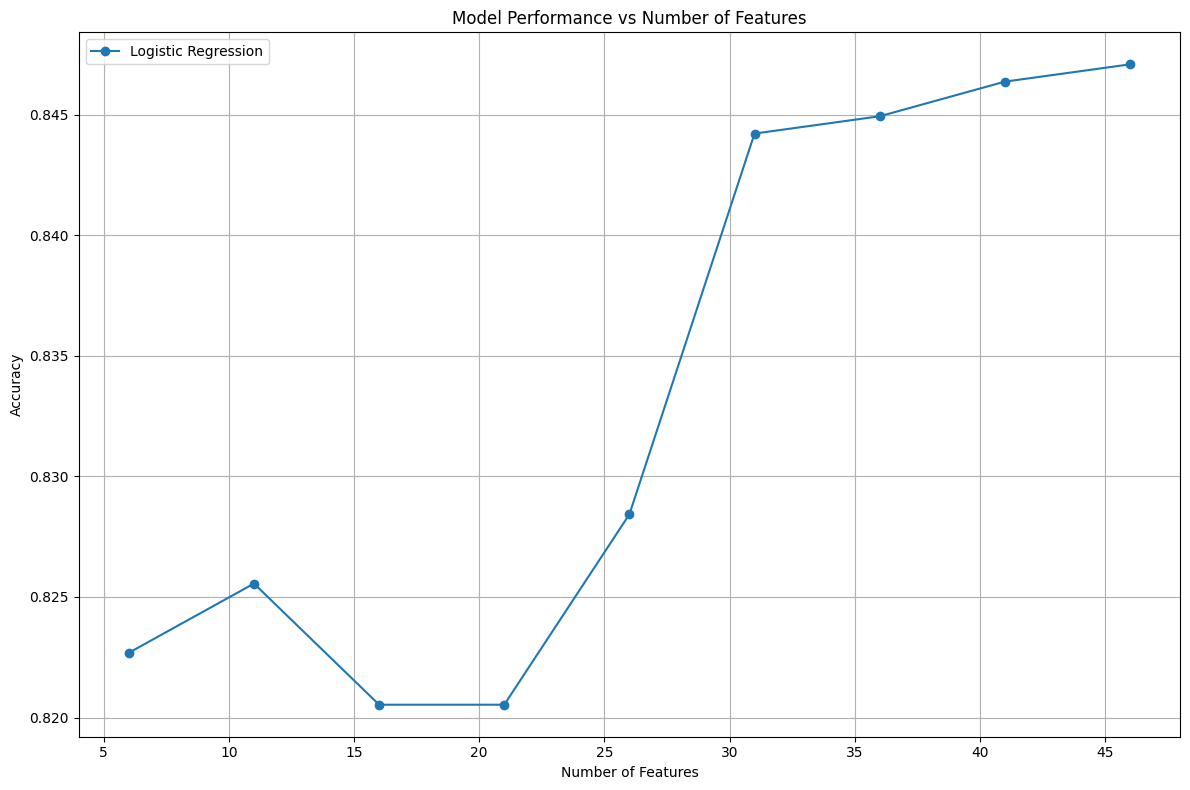

Best configuration for Logistic Regression:
  Number of features: 46
  Test accuracy: 0.8471

Overall best model: Logistic Regression
  Number of features: 46
  Test accuracy: 0.8471
Selected features: ['household_size', 'adults_count', 'income_earners', 'business_employees', 'age', 'monthly_income', 'expense_breakdown', 'avg_amount_sent', 'has_unemployed', 'ownership_status', 'financial_decision_maker', 'house_acquisition', 'household_assets', 'has_bank_account', 'has_disability', 'main_income_source', 'income_sector', 'marital_status', 'risk_preference_gain', 'risk_preference_loss', 'fee_affordability', 'unfair_treatment', 'system_downtime', 'digital_banking', 'expense_awareness', 'financial_tracking', 'investment_frequency', 'cash_shortage_frequency', 'emergency_fund_access', 'finhealth', 'finneeds', 'work_decision_maker', 'household_decision_role', 'preferred_investments', 'credit_activities', 'debt_manageability', 'borrowed_airtime', 'mobile_money_awareness', 'mobile_money_experie

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Use Logistic Regression for Feature Selection
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
    # 'Random Forest': RandomForestClassifier(random_state=42)
}

# Define the maximum number of features to try
max_features = min(50, X_preprocessed.shape[1])
step_size = max(1, max_features // 10)  # Step by 10% increments for efficiency

results = {}

for name, model in models.items():
    print(f"Running feature selection for {name}...")
    scores = []
    n_features_list = []
    selected_features_masks = {}
    
    for n in range(6, max_features + 1, step_size):
        start_time = time.time()
        print(f"  Testing with {n} features...")
        
        # Initialize the sequential feature selector
        sfs = SequentialFeatureSelector(
            model, 
            n_features_to_select=n,
            direction='forward',
            scoring='accuracy',
            cv=5,
            n_jobs=-1  # Use all available cores
        )
        
        # Fit the selector
        sfs.fit(X_train, y_train)
        
        # Get selected features and transform data
        X_train_selected = sfs.transform(X_train)
        X_test_selected = sfs.transform(X_test)
        
        # Train model on selected features
        model.fit(X_train_selected, y_train)
        
        # Evaluate model
        y_pred = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results
        scores.append(accuracy)
        n_features_list.append(n)
        selected_features_masks[n] = sfs.get_support()
        
        elapsed_time = time.time() - start_time
        print(f"    Accuracy with {n} features: {accuracy:.4f} (took {elapsed_time:.2f} seconds)")
    
    results[name] = {
        'scores': scores,
        'n_features': n_features_list,
        'selected_features': selected_features_masks
    }

# Plot results
plt.figure(figsize=(12, 8))
for name, result in results.items():
    plt.plot(result['n_features'], result['scores'], marker='o', label=name)

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Number of Features')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Find best configuration for each model
best_configs = {}
for name, result in results.items():
    best_idx = np.argmax(result['scores'])
    best_n_features = result['n_features'][best_idx]
    best_score = result['scores'][best_idx]
    best_mask = result['selected_features'][best_n_features]
    
    best_configs[name] = {
        'n_features': best_n_features,
        'accuracy': best_score,
        'feature_mask': best_mask
    }
    
    print(f"Best configuration for {name}:")
    print(f"  Number of features: {best_n_features}")
    print(f"  Test accuracy: {best_score:.4f}")

# Get overall best model
best_model_name = max(best_configs, key=lambda x: best_configs[x]['accuracy'])
best_model_config = best_configs[best_model_name]

print(f"\nOverall best model: {best_model_name}")
print(f"  Number of features: {best_model_config['n_features']}")
print(f"  Test accuracy: {best_model_config['accuracy']:.4f}")

# Determing features selected for the best model
if len(numerical_cols + categorical_cols) == X_preprocessed.shape[1]:  # If preprocessing didn't change the number of features
    all_features = numerical_cols + categorical_cols
    selected_features = [all_features[i] for i in range(len(all_features)) if best_model_config['feature_mask'][i]]
    print("Selected features:", selected_features)
else:
    print("Feature indices selected:", np.where(best_model_config['feature_mask'])[0])

In [95]:
y.value_counts(normalize = True)

target
0    0.75765
1    0.24235
Name: proportion, dtype: float64

In [173]:
mask = results['Logistic Regression']['selected_features'][41]

In [183]:
selected_features = [f for f, m in zip(new_columns, mask) if m]
selected_features[:5]

['household_size',
 'adults_count',
 'income_earners',
 'has_unemployed',
 'primary_education']

In [174]:
X_filtered = X_preprocessed[:, mask]

In [18]:
# Retrain model
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_filtered, y, test_size=0.2, random_state=42)
model_new = GradientBoostingClassifier(n_estimators = 100, max_depth = 3, learning_rate = 0.2, random_state = 42) #, 
# model_new = DecisionTreeClassifier(max_depth = 3, random_state = 42)
# model_new = LogisticRegression(max_iter=1000, random_state=42)

model_new.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)

In [20]:
print(classification_report(y_test_new, y_pred_new))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      1076
         1.0       0.72      0.61      0.66       317

    accuracy                           0.86      1393
   macro avg       0.80      0.77      0.78      1393
weighted avg       0.85      0.86      0.85      1393



In [21]:
roc_auc_score(y_test_new, y_pred_new)

0.7691004186553774

In [28]:
with open('model.pkl', 'wb') as f:
    pkl.dump(model_new, f)

with open('preprocessor.pkl', 'wb') as f:
    pkl.dump(preprocessor, f)
    
print("Saved")

Saved


In [46]:
# Load Saved model
with open('preprocessor.pkl', 'rb') as f:
    loaded_preprocessor = pkl.load(f)

with open('model.pkl', 'rb') as f:
    loaded_model = pkl.load(f)


LogisticRegression(max_iter=1000, random_state=42)